# Analysis of the di-muon spectrum using data from the CMS detector

This analysis takes data from the CMS experiment recorded in 2012 during Run B and C and extracts the di-muon spectrum. The di-muon spectrum is computed from the data by calculating the invariant mass of muon pairs with opposite charge. In the resulting plot, the particle resonances in a wide energy range from the [eta meson](https://en.wikipedia.org/wiki/Eta_meson) at about 548 MeV up to the [Z boson](https://en.wikipedia.org/wiki/W_and_Z_bosons) at about 91 GeV can be rediscovered.

Note that the bump at 30 GeV is not a resonance but an effect of the data taking due to the used trigger. The technical description of the dataset can be found in the respective record linked below.

The result of this analysis can be compared with [an official result of the CMS collaboration using data taken in 2010](https://cds.cern.ch/record/1456510), see the plot below:

![](http://cds.cern.ch/record/1456510/files/pictures_samples_dimuonSpectrum_40pb-1_mod-combined.png)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# in case you want to conduct an analysis on a larger sample - these steps were needed to obtain the samples:
#!wget https://zenodo.org/record/5345875/files/DataFiles_csv.tar.gz

#stop the execution after a few files - the statistics is large enough to be used in further calculations
#!tar xvzf DataFiles_csv.tar.gz


# used files:
# my_list = ['csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20000_17.csv',
#            'csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20001_18.csv',
#            'csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20001_11.csv'        
# ]

In [ ]:
# reading the dataframes
df_20000_07 = pd.read_csv('/content/drive/MyDrive/files_csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20000_07.csv')
df_20000_17 = pd.read_csv('/content/drive/MyDrive/files_csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20000_17.csv')
df_20001_18 = pd.read_csv('/content/drive/MyDrive/files_csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20001_18.csv')
df_20001_11 = pd.read_csv('/content/drive/MyDrive/files_csv/output_data_CMS_Run2012B_DoubleMuParked_AOD_22Jan2013-v1_20001_11.csv')

df = pd.concat([df_20000_07, df_20000_17, df_20001_18, df_20001_11])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,23,24,25,26,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head(10)

,entry,subentry,run,luminosityBlock,event,HLT_Dimuon10_Jpsi,HLT_Dimuon5_PsiPrime,HLT_Dimuon8_Jpsi,HLT_Dimuon9_PsiPrime,HLT_DoubleMu11_Acoplanarity03,HLT_DoubleMu3p5_LowMassNonResonant_Displaced,HLT_DoubleMu3p5_LowMass_Displaced,HLT_DoubleMu4_Acoplanarity03,HLT_DoubleMu5_IsoMu5,HLT_L2DoubleMu23_NoVertex,HLT_L2DoubleMu23_NoVertex_2Cha_Angle2p5,HLT_L2DoubleMu38_NoVertex_2Cha_Angle2p5,HLT_Mu13_Mu8,HLT_Mu13_Mu8_NoDZ,HLT_Mu17,HLT_Mu17_Mu8,HLT_Mu17_TkMu8,HLT_Mu17_TkMu8_NoDZ,HLT_Mu22_TkMu22,HLT_Mu22_TkMu8,HLT_Mu8,HLT_TripleMu5,PV_npvs,PV_x,PV_y,PV_z,nMuon,Muon_pt,Muon_eta,Muon_phi,Muon_mass,Muon_charge,Muon_pfRelIso03_all,Muon_pfRelIso04_all,Muon_tightId,Muon_softId,Muon_dxy,Muon_dxyErr,Muon_dz,Muon_dzErr,Muon_jetIdx,Muon_genPartIdx
0,0,0,195113,520,610174206,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,13.0,0.073731,0.061803,3.753879,2.0,14.819695,-2.196960,-1.635349,0.105658,-1.0,1.137804,1.319168,True,True,0.010309,0.003798,0.020990,0.009571,-1.0,-1.0
1,0,1,195113,520,610174206,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,13.0,0.073731,0.061803,3.753879,2.0,3.606570,0.979537,0.658010,0.105658,-1.0,0.285024,0.383009,False,True,-0.005491,0.004252,-9.231588,0.007019,-1.0,-1.0
2,1,0,195113,520,610290238,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,15.0,0.069919,0.065636,-0.834055,2.0,16.346264,1.634046,-2.909824,0.105658,1.0,0.000000,0.045491,True,True,-0.001230,0.001744,0.001935,0.005243,-1.0,-1.0
3,1,1,195113,520,610290238,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,15.0,0.069919,0.065636,-0.834055,2.0,14.089707,1.658635,-2.903751,0.105658,-1.0,0.000000,0.052776,False,True,-999.000000,-999.000000,-999.000000,-999.000000,-1.0,-1.0
4,3,0,195113,520,610299294,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,12.0,0.072607,0.061993,-1.575373,3.0,19.844963,-0.787970,-1.047606,0.105658,-1.0,0.937785,0.969841,True,True,0.010873,0.001831,0.042298,0.004403,-1.0,-1.0
5,3,1,195113,520,610299294,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,12.0,0.072607,0.061993,-1.575373,3.0,12.026176,0.787850,2.160038,0.105658,-1.0,1.856073,1.992317,True,True,-0.077138,0.001391,0.160404,0.003705,-1.0,-1.0
6,3,2,195113,520,610299294,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,12.0,0.072607,0.061993,-1.575373,3.0,6.156526,0.973258,2.038452,0.105658,-1.0,-999.000000,-999.000000,False,False,-999.000000,-999.000000,-999.000000,-999.000000,-1.0,-1.0
7,4,0,195113,520,610313286,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,15.0,0.070945,0.061371,-2.941182,2.0,9.162702,1.709643,-2.444818,0.105658,1.0,0.489313,0.757517,True,True,-0.003401,0.003048,0.027676,0.007037,-1.0,-1.0
8,4,1,195113,520,610313286,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,15.0,0.070945,0.061371,-2.941182,2.0,21.794065,0.333179,1.128834,0.105658,1.0,-999.000000,-999.000000,False,False,-0.006632,0.001278,-0.004466,0.002938,-1.0,-1.0
9,5,0,195113,520,610318678,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,15.0,0.056092,0.062200,-8.233137,2.0,8.688951,-1.279865,3.108582,0.105658,-1.0,0.000000,0.259908,True,True,-0.012128,0.001717,-0.059825,0.004774,-1.0,-1.0


In [ ]:
# dividing the dataframe for two muons for each event
df_muon1 = df[df['subentry'] == 0]
df_muon1

,entry,subentry,run,luminosityBlock,event,HLT_Dimuon10_Jpsi,HLT_Dimuon5_PsiPrime,HLT_Dimuon8_Jpsi,HLT_Dimuon9_PsiPrime,HLT_DoubleMu11_Acoplanarity03,HLT_DoubleMu3p5_LowMassNonResonant_Displaced,HLT_DoubleMu3p5_LowMass_Displaced,HLT_DoubleMu4_Acoplanarity03,HLT_DoubleMu5_IsoMu5,HLT_L2DoubleMu23_NoVertex,HLT_L2DoubleMu23_NoVertex_2Cha_Angle2p5,HLT_L2DoubleMu38_NoVertex_2Cha_Angle2p5,HLT_Mu13_Mu8,HLT_Mu13_Mu8_NoDZ,HLT_Mu17,HLT_Mu17_Mu8,HLT_Mu17_TkMu8,HLT_Mu17_TkMu8_NoDZ,HLT_Mu22_TkMu22,HLT_Mu22_TkMu8,HLT_Mu8,HLT_TripleMu5,PV_npvs,PV_x,PV_y,PV_z,nMuon,Muon_pt,Muon_eta,Muon_phi,Muon_mass,Muon_charge,Muon_pfRelIso03_all,Muon_pfRelIso04_all,Muon_tightId,Muon_softId,Muon_dxy,Muon_dxyErr,Muon_dz,Muon_dzErr,Muon_jetIdx,Muon_genPartIdx
0,0,0,195113,520,610174206,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,13.0,0.073731,0.061803,3.753879,2.0,14.819695,-2.196960,-1.635349,0.105658,-1.0,1.137804,1.319168,True,True,0.010309,0.003798,0.020990,0.009571,-1.0,-1.0
2,1,0,195113,520,610290238,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,15.0,0.069919,0.065636,-0.834055,2.0,16.346264,1.634046,-2.909824,0.105658,1.0,0.000000,0.045491,True,True,-0.001230,0.001744,0.001935,0.005243,-1.0,-1.0
4,3,0,195113,520,610299294,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,12.0,0.072607,0.061993,-1.575373,3.0,19.844963,-0.787970,-1.047606,0.105658,-1.0,0.937785,0.969841,True,True,0.010873,0.001831,0.042298,0.004403,-1.0,-1.0
7,4,0,195113,520,610313286,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,15.0,0.070945,0.061371,-2.941182,2.0,9.162702,1.709643,-2.444818,0.105658,1.0,0.489313,0.757517,True,True,-0.003401,0.003048,0.027676,0.007037,-1.0,-1.0
9,5,0,195113,520,610318678,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,15.0,0.056092,0.062200,-8.233137,2.0,8.688951,-1.279865,3.108582,0.105658,-1.0,0.000000,0.259908,True,True,-0.012128,0.001717,-0.059825,0.004774,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276252,572632,0,195014,22,28279748,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,16.0,0.073671,0.060623,3.830377,2.0,50.411156,2.119206,-0.000158,0.105658,-1.0,0.000000,0.000000,True,True,-0.001565,0.001100,0.001086,0.008003,-1.0,-1.0
1276254,572634,0,195014,22,28332804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,22.0,0.073715,0.063545,1.051028,2.0,18.522154,0.651177,-2.185147,0.105658,1.0,1.608229,1.708255,True,True,0.004957,0.001345,0.010845,0.003173,-1.0,-1.0
1276256,572635,0,195014,22,28311220,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,14.0,0.072015,0.061389,-8.408463,2.0,19.831528,0.458157,0.567956,0.105658,1.0,0.301583,0.375339,True,True,-0.000726,0.001175,0.000232,0.002575,-1.0,-1.0
1276258,572638,0,195014,22,28400212,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,18.0,0.073599,0.066043,2.203276,2.0,38.427723,-1.354132,-1.387283,0.105658,-1.0,0.000000,0.008356,True,True,0.001530,0.001250,0.002831,0.004273,-1.0,-1.0


In [ ]:
df_muon2 = df[df['subentry'] == 1]
df_muon2

,entry,subentry,run,luminosityBlock,event,HLT_Dimuon10_Jpsi,HLT_Dimuon5_PsiPrime,HLT_Dimuon8_Jpsi,HLT_Dimuon9_PsiPrime,HLT_DoubleMu11_Acoplanarity03,HLT_DoubleMu3p5_LowMassNonResonant_Displaced,HLT_DoubleMu3p5_LowMass_Displaced,HLT_DoubleMu4_Acoplanarity03,HLT_DoubleMu5_IsoMu5,HLT_L2DoubleMu23_NoVertex,HLT_L2DoubleMu23_NoVertex_2Cha_Angle2p5,HLT_L2DoubleMu38_NoVertex_2Cha_Angle2p5,HLT_Mu13_Mu8,HLT_Mu13_Mu8_NoDZ,HLT_Mu17,HLT_Mu17_Mu8,HLT_Mu17_TkMu8,HLT_Mu17_TkMu8_NoDZ,HLT_Mu22_TkMu22,HLT_Mu22_TkMu8,HLT_Mu8,HLT_TripleMu5,PV_npvs,PV_x,PV_y,PV_z,nMuon,Muon_pt,Muon_eta,Muon_phi,Muon_mass,Muon_charge,Muon_pfRelIso03_all,Muon_pfRelIso04_all,Muon_tightId,Muon_softId,Muon_dxy,Muon_dxyErr,Muon_dz,Muon_dzErr,Muon_jetIdx,Muon_genPartIdx
1,0,1,195113,520,610174206,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,13.0,0.073731,0.061803,3.753879,2.0,3.606570,0.979537,0.658010,0.105658,-1.0,0.285024,0.383009,False,True,-0.005491,0.004252,-9.231588,0.007019,-1.0,-1.0
3,1,1,195113,520,610290238,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,15.0,0.069919,0.065636,-0.834055,2.0,14.089707,1.658635,-2.903751,0.105658,-1.0,0.000000,0.052776,False,True,-999.000000,-999.000000,-999.000000,-999.000000,-1.0,-1.0
5,3,1,195113,520,610299294,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,12.0,0.072607,0.061993,-1.575373,3.0,12.026176,0.787850,2.160038,0.105658,-1.0,1.856073,1.992317,True,True,-0.077138,0.001391,0.160404,0.003705,-1.0,-1.0
8,4,1,195113,520,610313286,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,15.0,0.070945,0.061371,-2.941182,2.0,21.794065,0.333179,1.128834,0.105658,1.0,-999.000000,-999.000000,False,False,-0.006632,0.001278,-0.004466,0.002938,-1.0,-1.0
10,5,1,195113,520,610318678,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,15.0,0.056092,0.062200,-8.233137,2.0,28.470043,1.062386,2.219021,0.105658,1.0,-999.000000,-999.000000,False,False,-999.000000,-999.000000,-999.000000,-999.000000,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276253,572632,1,195014,22,28279748,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,16.0,0.073671,0.060623,3.830377,2.0,39.157520,1.615490,2.960947,0.105658,1.0,0.138652,0.138652,True,True,-0.000944,0.001113,0.002596,0.003698,-1.0,-1.0
1276255,572634,1,195014,22,28332804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,22.0,0.073715,0.063545,1.051028,2.0,11.493775,0.788768,-2.146370,0.105658,1.0,-999.000000,-999.000000,False,False,-999.000000,-999.000000,-999.000000,-999.000000,-1.0,-1.0
1276257,572635,1,195014,22,28311220,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,14.0,0.072015,0.061389,-8.408463,2.0,12.295939,0.445967,0.618629,0.105658,-1.0,0.486408,0.605367,True,True,0.000123,0.001455,0.002807,0.002783,-1.0,-1.0
1276259,572638,1,195014,22,28400212,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,18.0,0.073599,0.066043,2.203276,2.0,40.398052,-0.207399,1.502925,0.105658,1.0,0.027137,0.027137,True,True,-0.000616,0.001069,-0.002786,0.002773,-1.0,-1.0


In [ ]:
# now let's change the structure of the DataFrames so making the cuts will be easier - less columns

df_for_cuts1 = df_muon1.loc[:, 'nMuon':'Muon_charge']
df_for_cuts1['event'] = df_muon1['event']
df_for_cuts2 = df_muon2.loc[:, 'nMuon':'Muon_charge']
df_for_cuts2['event'] = df_muon2['event']
df_for_cuts1, df_for_cuts2

(         nMuon    Muon_pt  Muon_eta  ...  Muon_mass  Muon_charge      event
 0          2.0  14.819695 -2.196960  ...   0.105658         -1.0  610174206
 2          2.0  16.346264  1.634046  ...   0.105658          1.0  610290238
 4          3.0  19.844963 -0.787970  ...   0.105658         -1.0  610299294
 7          2.0   9.162702  1.709643  ...   0.105658          1.0  610313286
 9          2.0   8.688951 -1.279865  ...   0.105658         -1.0  610318678
 ...        ...        ...       ...  ...        ...          ...        ...
 1276252    2.0  50.411156  2.119206  ...   0.105658         -1.0   28279748
 1276254    2.0  18.522154  0.651177  ...   0.105658          1.0   28332804
 1276256    2.0  19.831528  0.458157  ...   0.105658          1.0   28311220
 1276258    2.0  38.427723 -1.354132  ...   0.105658         -1.0   28400212
 1276260    2.0  18.206020  1.527079  ...   0.105658         -1.0   28445780
 
 [1157103 rows x 7 columns],
          nMuon    Muon_pt  Muon_eta  ...  Mu

In [ ]:
# cut on the number of muons in the event - we want the clear dimuon signature (for simplicity)
df_2mu1 = df_for_cuts1[df_for_cuts1["nMuon"] == 2.0]
df_2mu2 = df_for_cuts2[df_for_cuts2["nMuon"] == 2.0]
df_2mu1, df_2mu2

(         nMuon    Muon_pt  Muon_eta  ...  Muon_mass  Muon_charge      event
 0          2.0  14.819695 -2.196960  ...   0.105658         -1.0  610174206
 2          2.0  16.346264  1.634046  ...   0.105658          1.0  610290238
 7          2.0   9.162702  1.709643  ...   0.105658          1.0  610313286
 9          2.0   8.688951 -1.279865  ...   0.105658         -1.0  610318678
 11         2.0  12.201107 -0.495402  ...   0.105658          1.0  610331414
 ...        ...        ...       ...  ...        ...          ...        ...
 1276252    2.0  50.411156  2.119206  ...   0.105658         -1.0   28279748
 1276254    2.0  18.522154  0.651177  ...   0.105658          1.0   28332804
 1276256    2.0  19.831528  0.458157  ...   0.105658          1.0   28311220
 1276258    2.0  38.427723 -1.354132  ...   0.105658         -1.0   28400212
 1276260    2.0  18.206020  1.527079  ...   0.105658         -1.0   28445780
 
 [681482 rows x 7 columns],
          nMuon    Muon_pt  Muon_eta  ...  Muo

In [ ]:
# now, let's merge our DataFrames for two muons, so that we have all information about two muons in an event in one row of one table

#we can get rid of the "nMuon" columns, as they don't give us any useful information anymore - the dataset is constrained to the dimuon candidates
df_2mu1 = df_2mu1.drop('nMuon', 1)
df_2mu2 = df_2mu2.drop('nMuon', 1)
# now we need to drop the index so that it would be later on used for merging between dataframes:
df_2mu1 = df_2mu1.reset_index()
df_2mu2 = df_2mu2.reset_index()
df_2mu1, df_2mu2

(          index    Muon_pt  Muon_eta  ...  Muon_mass  Muon_charge      event
 0             0  14.819695 -2.196960  ...   0.105658         -1.0  610174206
 1             2  16.346264  1.634046  ...   0.105658          1.0  610290238
 2             7   9.162702  1.709643  ...   0.105658          1.0  610313286
 3             9   8.688951 -1.279865  ...   0.105658         -1.0  610318678
 4            11  12.201107 -0.495402  ...   0.105658          1.0  610331414
 ...         ...        ...       ...  ...        ...          ...        ...
 681477  1276252  50.411156  2.119206  ...   0.105658         -1.0   28279748
 681478  1276254  18.522154  0.651177  ...   0.105658          1.0   28332804
 681479  1276256  19.831528  0.458157  ...   0.105658          1.0   28311220
 681480  1276258  38.427723 -1.354132  ...   0.105658         -1.0   28400212
 681481  1276260  18.206020  1.527079  ...   0.105658         -1.0   28445780
 
 [681482 rows x 7 columns],
           index    Muon_pt  Muon_

In [ ]:
df_merge = pd.merge(df_2mu1, df_2mu2, on="event", suffixes=('_1', '_2'))
df_merge

,index_1,Muon_pt_1,Muon_eta_1,Muon_phi_1,Muon_mass_1,Muon_charge_1,event,index_2,Muon_pt_2,Muon_eta_2,Muon_phi_2,Muon_mass_2,Muon_charge_2
0,0,14.819695,-2.196960,-1.635349,0.105658,-1.0,610174206,1,3.606570,0.979537,0.658010,0.105658,-1.0
1,2,16.346264,1.634046,-2.909824,0.105658,1.0,610290238,3,14.089707,1.658635,-2.903751,0.105658,-1.0
2,7,9.162702,1.709643,-2.444818,0.105658,1.0,610313286,8,21.794065,0.333179,1.128834,0.105658,1.0
3,9,8.688951,-1.279865,3.108582,0.105658,-1.0,610318678,10,28.470043,1.062386,2.219021,0.105658,1.0
4,11,12.201107,-0.495402,-2.231133,0.105658,1.0,610331414,12,5.426965,0.313729,2.370856,0.105658,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681898,1276252,50.411156,2.119206,-0.000158,0.105658,-1.0,28279748,1276253,39.157520,1.615490,2.960947,0.105658,1.0
681899,1276254,18.522154,0.651177,-2.185147,0.105658,1.0,28332804,1276255,11.493775,0.788768,-2.146370,0.105658,1.0
681900,1276256,19.831528,0.458157,0.567956,0.105658,1.0,28311220,1276257,12.295939,0.445967,0.618629,0.105658,-1.0
681901,1276258,38.427723,-1.354132,-1.387283,0.105658,-1.0,28400212,1276259,40.398052,-0.207399,1.502925,0.105658,1.0


In [ ]:
#now - the muon candidates in a pair need to have an opposite charge (conservation of charge):
df_os = df_merge[df_merge['Muon_charge_1'] != df_merge['Muon_charge_2']]
df_os

,index_1,Muon_pt_1,Muon_eta_1,Muon_phi_1,Muon_mass_1,Muon_charge_1,event,index_2,Muon_pt_2,Muon_eta_2,Muon_phi_2,Muon_mass_2,Muon_charge_2
1,2,16.346264,1.634046,-2.909824,0.105658,1.0,610290238,3,14.089707,1.658635,-2.903751,0.105658,-1.0
3,9,8.688951,-1.279865,3.108582,0.105658,-1.0,610318678,10,28.470043,1.062386,2.219021,0.105658,1.0
4,11,12.201107,-0.495402,-2.231133,0.105658,1.0,610331414,12,5.426965,0.313729,2.370856,0.105658,-1.0
5,16,8.646707,1.481959,1.747537,0.105658,-1.0,610411542,17,15.564596,1.599135,1.458410,0.105658,1.0
6,18,9.907455,0.072832,1.242955,0.105658,-1.0,610441254,19,13.627468,-0.219600,1.430295,0.105658,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681897,1276244,9.604613,0.297026,-1.071449,0.105658,-1.0,28276340,1276245,13.843822,0.754167,2.108870,0.105658,1.0
681898,1276252,50.411156,2.119206,-0.000158,0.105658,-1.0,28279748,1276253,39.157520,1.615490,2.960947,0.105658,1.0
681900,1276256,19.831528,0.458157,0.567956,0.105658,1.0,28311220,1276257,12.295939,0.445967,0.618629,0.105658,-1.0
681901,1276258,38.427723,-1.354132,-1.387283,0.105658,-1.0,28400212,1276259,40.398052,-0.207399,1.502925,0.105658,1.0


In [ ]:
# the extra columns corresponding to charges and indexes can now be dropped!
df_os = df_os.drop('Muon_charge_1', 1)
df_os = df_os.drop('Muon_charge_2', 1)
df_os = df_os.drop('index_1', 1)
df_os = df_os.drop('index_2', 1)

df_os

,Muon_pt_1,Muon_eta_1,Muon_phi_1,Muon_mass_1,event,Muon_pt_2,Muon_eta_2,Muon_phi_2,Muon_mass_2
1,16.346264,1.634046,-2.909824,0.105658,610290238,14.089707,1.658635,-2.903751,0.105658
3,8.688951,-1.279865,3.108582,0.105658,610318678,28.470043,1.062386,2.219021,0.105658
4,12.201107,-0.495402,-2.231133,0.105658,610331414,5.426965,0.313729,2.370856,0.105658
5,8.646707,1.481959,1.747537,0.105658,610411542,15.564596,1.599135,1.458410,0.105658
6,9.907455,0.072832,1.242955,0.105658,610441254,13.627468,-0.219600,1.430295,0.105658
...,...,...,...,...,...,...,...,...,...
681897,9.604613,0.297026,-1.071449,0.105658,28276340,13.843822,0.754167,2.108870,0.105658
681898,50.411156,2.119206,-0.000158,0.105658,28279748,39.157520,1.615490,2.960947,0.105658
681900,19.831528,0.458157,0.567956,0.105658,28311220,12.295939,0.445967,0.618629,0.105658
681901,38.427723,-1.354132,-1.387283,0.105658,28400212,40.398052,-0.207399,1.502925,0.105658


In [ ]:
# defining custom function for invariant mass calculation:
# this is true for the case of LHC
import numpy as np

def InvMass(dataset):
  ET1 = np.sqrt(dataset.Muon_pt_1 * dataset.Muon_pt_1 + dataset.Muon_mass_1 * dataset.Muon_mass_1)
  ET2 = np.sqrt(dataset.Muon_pt_2 * dataset.Muon_pt_2 + dataset.Muon_mass_2 * dataset.Muon_mass_2)
  invariant_mass = np.sqrt(dataset.Muon_mass_1 * dataset.Muon_mass_1 + dataset.Muon_mass_2 * dataset.Muon_mass_2+ 2*(ET1*ET2*np.cosh(dataset.Muon_eta_1-dataset.Muon_eta_2) - dataset.Muon_pt_1 * dataset.Muon_pt_2 * np.cos(dataset.Muon_phi_1-dataset.Muon_phi_2)))
  return invariant_mass

In [ ]:
a = InvMass(df_os)
a

1          0.438934
3         47.815089
4         13.887085
5          3.615384
6          4.049681
            ...    
681897    23.663928
681898    91.341985
681900     0.842317
681901    91.581900
681902     3.113229
Length: 517702, dtype: float64

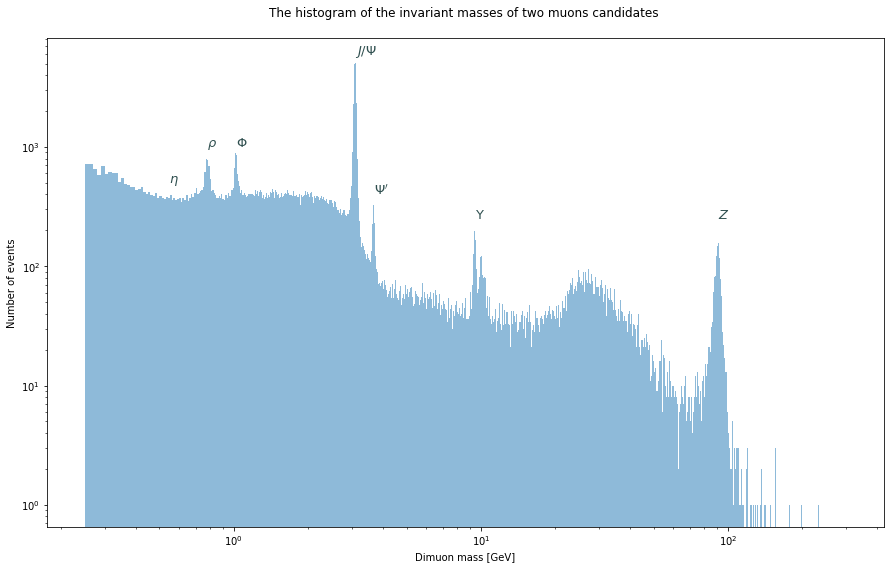

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting the final figure

fig, ax = plt.subplots()
hist2 = a.plot(kind="hist", bins=30000, range=[0.25, 300.0], loglog=True, edgecolor='None', alpha = 0.5)
fig.set_size_inches([15,9])

# Name the axes and give the title.
plt.xlabel('Dimuon mass [GeV]')
plt.ylabel('Number of events')
plt.title('The histogram of the invariant masses of two muons candidates \n') # \n creates a new line for making the title look better

#values taken from Particle Data Group
eta_mass = 547.862 / 1000. #in GeV
phi_mass = 1019.461 / 1000. #in GeV
rho_mass = 775.26 / 1000. #in GeV
jpsi_mass = 3096.900 / 1000. #in GeV
psi_prime_mass = 3686.111 / 1000. #in GeV
upsilon_mass = 9460.30 / 1000. #in GeV
Z_mass = 91.1876 #in GeV

hist2.annotate(r'$\eta$', xy=(eta_mass,500), family='sans-serif', fontsize=13, color='darkslategrey')
hist2.annotate(r'$\rho$', xy=(rho_mass,1000), family='sans-serif', fontsize=13, color='darkslategrey')
hist2.annotate(r'$\Phi$', xy=(phi_mass,1000), family='sans-serif', fontsize=13, color='darkslategrey')
hist2.annotate(r'$J/\Psi$', xy=(jpsi_mass,6000), family='sans-serif', fontsize=13, color='darkslategrey')
hist2.annotate(r'$\Psi^{\prime}$', xy=(psi_prime_mass,400), family='sans-serif', fontsize=13, color='darkslategrey')
hist2.annotate(r'$\Upsilon$', xy=(upsilon_mass,250), family='sans-serif', fontsize=13, color='darkslategrey')
hist2.annotate(r'$Z$', xy=(Z_mass,250), family='sans-serif', fontsize=13, color='darkslategrey')

# Show the plot.
plt.show()
plt.savefig("my_analysis_plot.jpg")
# the plotting style of the histogram wasn't changed much due to the fact that the logscale on x-axis doesn't work properly for most of the conventional plotting styles (e.g. for Seaborn)

The original plot for the comparison:

![](http://cds.cern.ch/record/1456510/files/pictures_samples_dimuonSpectrum_40pb-1_mod-combined.png)

The plots are quite similar (the resonanse peaks can be seen in correct places - except for the $\eta$ meson, most likely due to the low statistics applied in this exercise). Other differences are connected to different cuts applied in comparison to the CMS analysis (e.g. we got rid of the events with several muon pairs). For further check, the plot can be remade for larger sample of CMS events.